In [11]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [12]:
df = pd.read_csv('Ordinal+Elastic.csv')

In [13]:
df.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Elastic
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,121089.504843
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,132818.571424
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,124620.266080


In [14]:
X_ordinal = df.drop(['SalePrice'], axis=1).values
Y_ordinal = df.SalePrice.values

In [15]:
X_ordinal.shape

(2580, 83)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
gbm = GradientBoostingRegressor()
gbm.fit(X_train_scaled, Y_train)
GBM_Score = gbm.score(X_test_scaled, Y_test)

In [17]:
GBM_Score

0.933607809477464

In [18]:
gbm.feature_importances_

array([2.43102975e-05, 6.77071579e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.54212772e-03, 0.00000000e+00,
       2.25579603e-05, 0.00000000e+00, 5.57673699e-04, 3.80877234e-04,
       1.06698541e-03, 1.83798770e-05, 3.81369011e-05, 5.67040693e-04,
       3.61446364e-04, 7.50548114e-06, 2.25441287e-03, 3.45338574e-04,
       0.00000000e+00, 6.62671036e-05, 6.03817069e-06, 4.04122354e-05,
       0.00000000e+00, 3.18010808e-05, 1.02643707e-04, 1.45671979e-04,
       0.00000000e+00, 2.09729348e-04, 1.19981073e-04, 0.00000000e+00,
       8.55325468e-04, 2.50212473e-04, 2.17455873e-05, 1.34815107e-05,
       2.64221558e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.36545718e-05,
       2.04403735e-04, 0.00000000e+00, 5.01705727e-04, 1.31774882e-04,
       2.51306268e-03, 4.92128378e-03, 2.91742353e-03, 1.20230803e-03,
       4.64755014e-03, 1.45751354e-03, 1.90901646e-03, 7.61607742e-04,
      

In [19]:
X_cols = df.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('Elastic', 0.9510906411223116),
 ('2ndFlrSF', 0.005365923773704848),
 ('GrLivArea', 0.004921283778757795),
 ('OverallQual', 0.004647550141963151),
 ('LotFrontage', 0.0029174235250137995),
 ('LandContour', 0.002542127721811119),
 ('PID', 0.0025130626812053867),
 ('MasVnrArea', 0.002466440329490102),
 ('Exterior2nd', 0.0022544128650701088),
 ('YearBuilt', 0.0019090164599588275),
 ('BsmtFinSF1', 0.001796446368058987),
 ('OverallCond', 0.0014575135402579969),
 ('TotalBsmtSF', 0.0013547697686191276),
 ('LotArea', 0.0012023080271248035),
 ('1stFlrSF', 0.0010750521064133193),
 ('Condition2', 0.001066985411092501),
 ('KitchenQual', 0.0008553254682736181),
 ('YearRemodAdd', 0.0007616077418285294),
 ('BedroomAbvGr', 0.0007173014546661955),
 ('WoodDeckSF', 0.000694475328588234),
 ('GarageYrBlt', 0.0006174875097051772),
 ('RoofStyle', 0.0005670406931164006),
 ('Fireplaces', 0.0005631577930918098),
 ('GarageArea', 0.0005591613309404429),
 ('Neighborhood', 0.0005576736991453087),
 ('OpenPorchSF', 

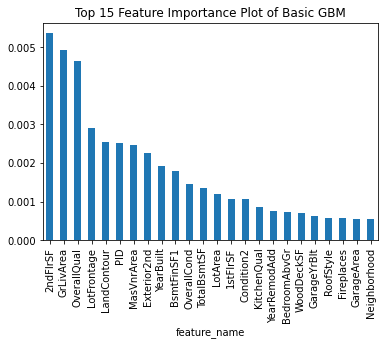

In [20]:
a, b = zip(*sorted_importance[1:25]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [21]:
X_ordinal_scaled = scaler.transform(X_ordinal)
len(X_ordinal_scaled)

2580

In [22]:
predicted_value = gbm.predict(X_ordinal_scaled)

In [23]:
true_value = Y_ordinal

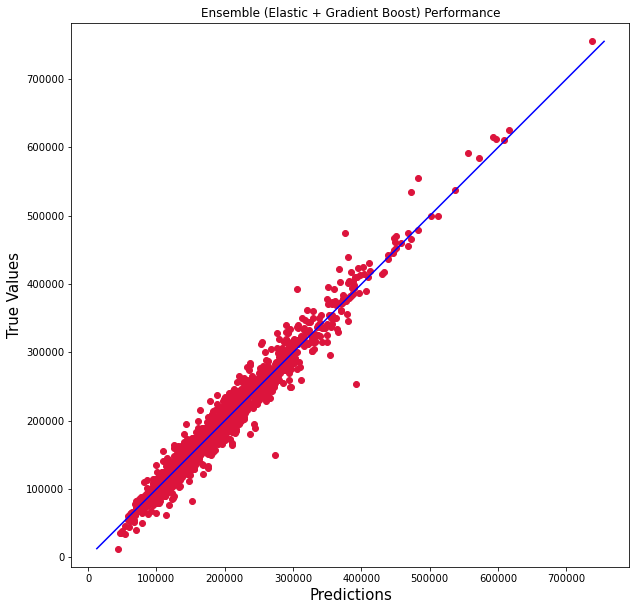

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Ensemble (Elastic + Gradient Boost) Performance')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()